## importing libraries

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import os 
import matplotlib.pyplot as plt

working with the modified training dataset obtained from the kaggle's online notebook 


In [3]:
train = pd.read_csv('/home/rhythm/Research/ml/ice-cube/train_New.csv')

In [4]:
train.head()

,Unnamed: 0,event_id,mCharge,mTime,TrueEv,initZen,initAz,dZen,dAz,mFreePath,batch_id,first_pulse_index,last_pulse_index,azimuth,zenith
0,0,2028147085,0.916463,106.278689,71.0,-2.894104,1.482011,-0.016698,-0.005367,422.295872,624,1742861,1742983,5.780518,1.622565
1,1,2031179140,0.956522,220.822222,12.0,0.017752,1.636312,0.029178,-0.020427,622.805814,624,32613749,32613794,2.765109,2.788138
2,2,2030575936,0.955612,217.791667,19.0,-0.864117,1.966697,0.035997,0.023031,633.803890,624,26711032,26711080,2.706114,2.724042
3,3,2028527930,1.076205,151.146341,38.0,-0.243179,1.062600,0.029708,-0.000470,458.816575,624,6075896,6075978,4.280267,1.781559
4,4,2031129013,0.993462,185.125000,26.0,-2.704366,1.500928,-0.021463,0.011001,526.682326,624,32154961,32155025,4.633283,2.071044


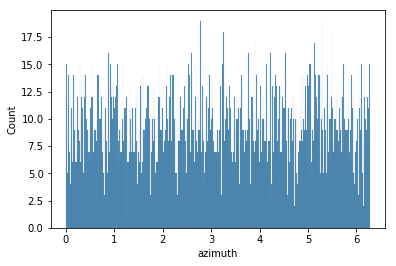

In [6]:
# let's look at the distribution of the targets
sns.histplot(train.azimuth, bins=640)

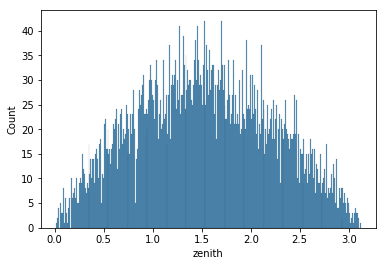

In [7]:
# let's look at the distribution of the targets
sns.histplot(train.zenith, bins=320)

we see that the azimuth is kimd of uniformly distributed between $ 0 -  2\pi$
while the zenith is from $ 0 - \pi $ with the peak at ~ 1.5 

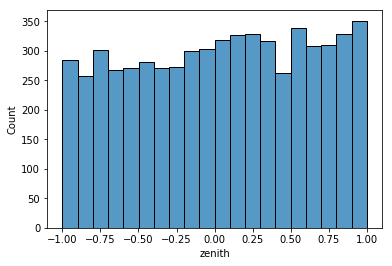

In [10]:
sns.histplot(np.cos(train.zenith), bins = 20)

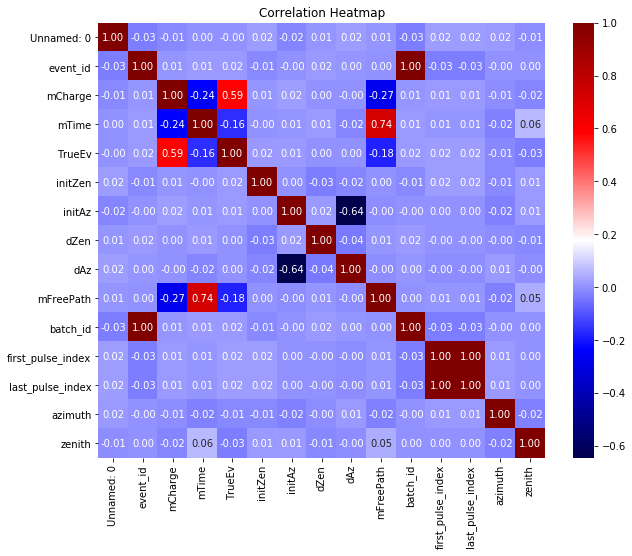

In [13]:
corr_matrix = train.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt = '.2f',cmap='seismic')
plt.title("Correlation Heatmap")
plt.show()

Relation between the features and the targert variables

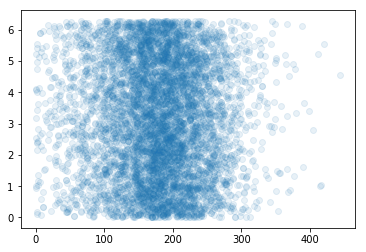

In [18]:
# relation between the target vars (itself)
plt.scatter(x  = train.mTime, y = train.azimuth, alpha = 0.1)

In [23]:
train.columns

Index(['Unnamed: 0', 'event_id', 'mCharge', 'mTime', 'TrueEv', 'initZen',
       'initAz', 'dZen', 'dAz', 'mFreePath', 'batch_id', 'first_pulse_index',
       'last_pulse_index', 'azimuth', 'zenith'],
      dtype='object')

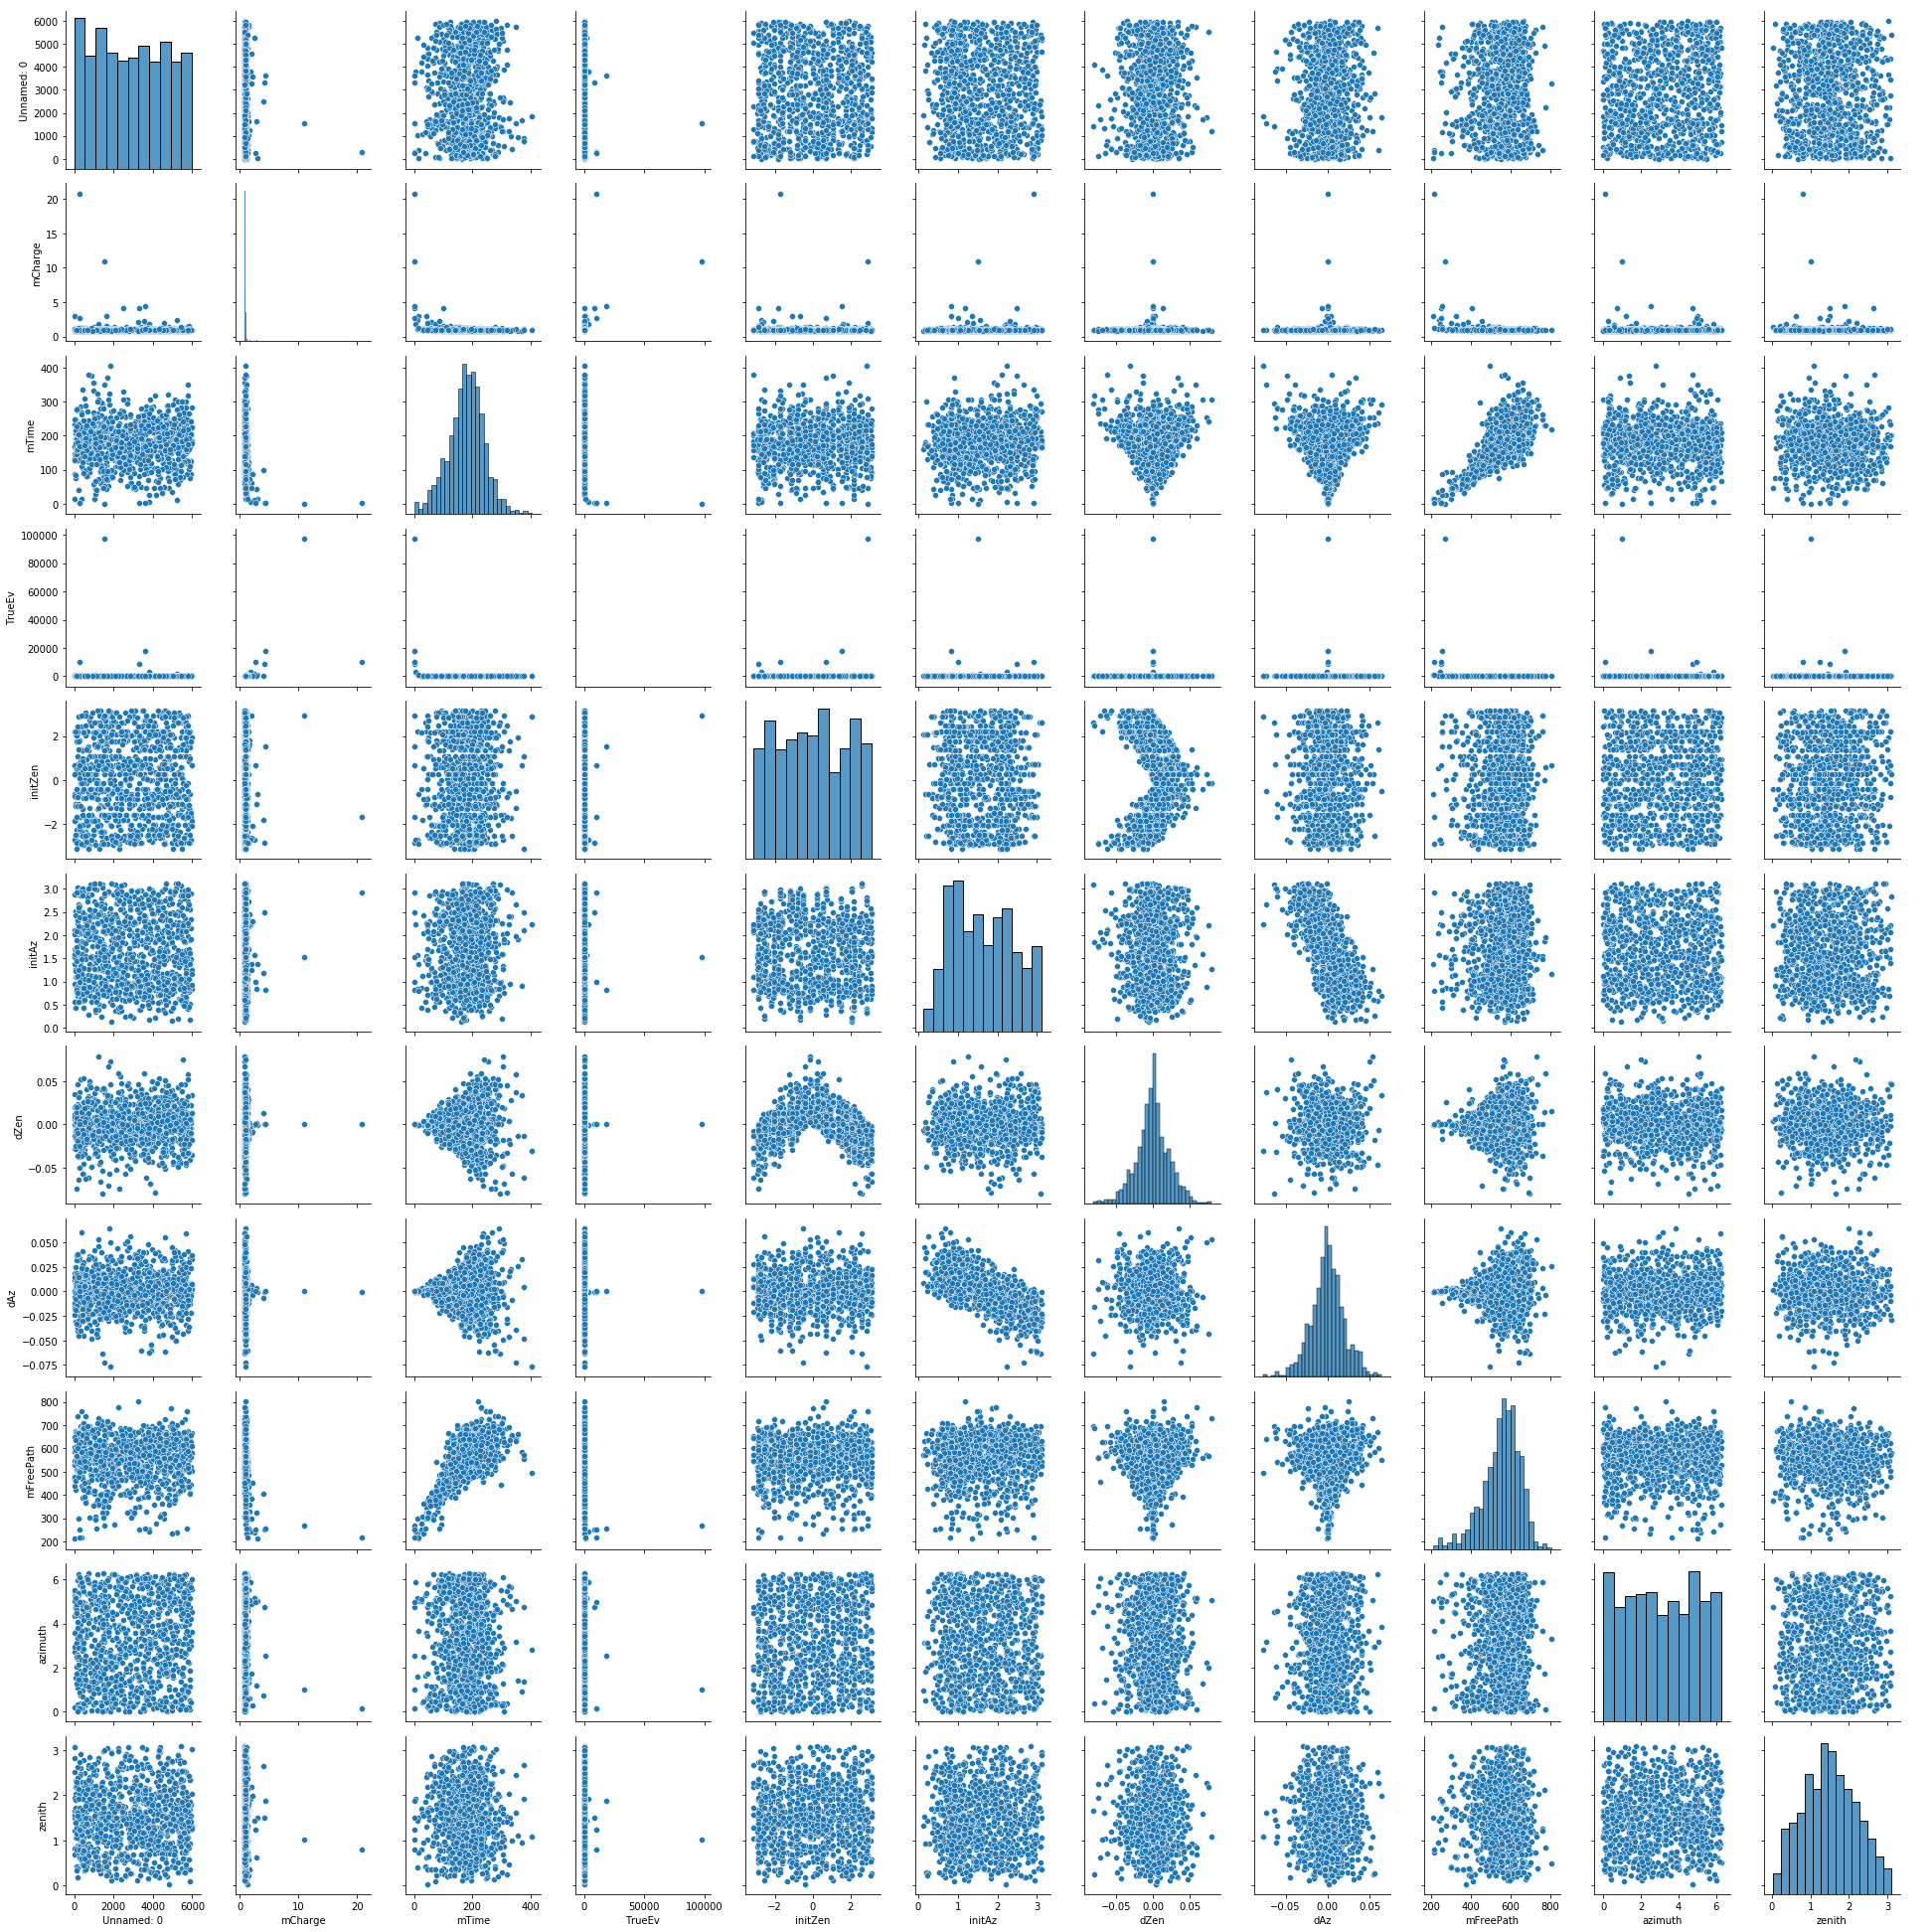

In [26]:
train_x = train.drop(['batch_id', 'event_id','first_pulse_index','last_pulse_index' ], axis =1 )
cols = ['mCharge', 'mTime', 'TrueEv', 'initZen',
       'initAz', 'dZen', 'dAz', 'mFreePath',  'azimuth', 'zenith']
sample_size = 1000

# Randomly sample from the DataFrame
random_sample = train_x.sample(n=sample_size, random_state=42)

# Plot the pairplot using the random sample
sns.pairplot(random_sample, height = 2.5)

#sns.pairplot(train_x[cols], )
plt.show()

In the above plots we see some outlers for truevents, mCharge ! (Let's) look at its boxplot.

#missing V

## OUTLIERS 
 -  True Events and avg Charge

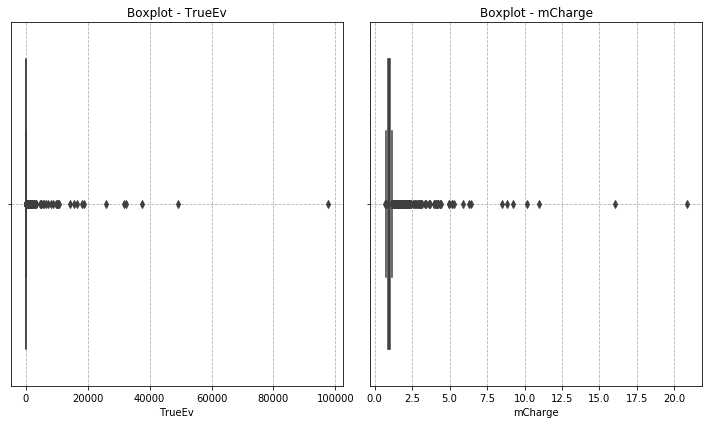

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
labels = ['TrueEv', 'mCharge']
# Plot the boxplot for the first column
for i,label in enumerate(labels):
#    print(i)
    sns.boxplot(x=train_x[label],ax = axes[i])
    axes[i].set_title('Boxplot - ' + label)
    axes[i].grid(linestyle= '--')


# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

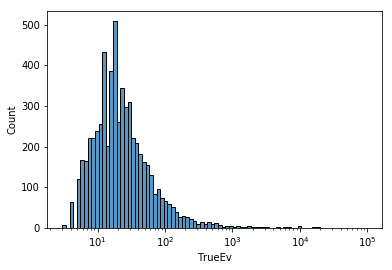

In [50]:
sns.histplot(train_x.TrueEv, log_scale=(True, False))

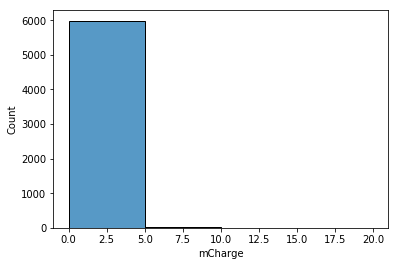

In [55]:
sns.histplot(train_x.mCharge, binrange=(0,20),bins = 4)

In [57]:
train_charge = train_x[train_x.mCharge > 5]
train_charge

,Unnamed: 0,mCharge,mTime,TrueEv,initZen,initAz,dZen,dAz,mFreePath,azimuth,zenith
293,293,20.840915,1.771672,10472.0,-1.691961,2.913904,0.000031,-0.000200,216.843012,0.119579,0.803910
350,350,8.472307,2.020480,9825.0,0.572112,2.507089,0.000177,-0.000154,205.174847,5.417030,2.288840
1557,1557,10.970986,0.269133,97475.0,2.934095,1.519091,-0.000023,0.000005,269.531412,0.994851,1.007705
2224,2224,16.048131,0.764015,26021.0,-1.328075,1.217948,-0.000046,0.000002,245.279680,4.095154,1.650960
2351,2351,6.437369,9.450829,1749.0,-1.077637,1.355213,0.000750,0.000447,233.402159,2.684236,2.544381
2449,2449,5.329916,7.563079,2710.0,-0.856930,2.435891,0.000339,-0.000271,268.060832,0.588283,1.695079
3170,3170,5.161556,5.340133,5001.0,0.994099,2.556257,0.000159,-0.000387,180.515811,4.128528,1.467930
3318,3318,5.184840,3.542485,5942.0,2.206583,1.652785,0.000045,-0.000144,272.959780,3.618507,0.312385
3723,3723,5.895523,8.979269,1958.0,-1.077637,2.131699,-0.000412,-0.000098,192.901297,3.971926,0.747574
5666,5666,10.136265,1.952837,10822.0,2.220090,1.257460,-0.000135,0.000146,220.361355,2.379533,0.287840


In [58]:
train_TrueEv = train_x[train_x['TrueEv'] > 200]
train_TrueEv

,Unnamed: 0,mCharge,mTime,TrueEv,initZen,initAz,dZen,dAz,mFreePath,azimuth,zenith
31,31,3.004136,15.465742,1157.0,-0.646659,1.369695,-0.000191,-0.000430,210.892355,5.004635,1.503310
71,71,0.989634,44.498778,314.0,2.227266,2.075650,-0.004839,0.002065,348.410850,5.250956,0.736016
142,142,2.211487,7.091431,2680.0,0.367874,2.477930,0.000797,0.000223,217.931884,1.127245,1.532875
183,183,0.917165,41.422857,262.0,-0.243179,2.110478,0.003761,-0.001932,381.537751,0.724398,1.841586
205,205,0.947447,46.007143,307.0,1.626607,1.809664,0.002298,0.003086,327.273094,0.271376,1.314800
...,...,...,...,...,...,...,...,...,...,...,...
5874,5874,0.994837,18.039891,976.0,-2.925808,1.949100,-0.001239,0.000770,240.004665,4.648523,0.838157
5902,5902,1.890059,12.774503,1301.0,-2.238604,1.371637,0.000145,-0.000423,230.885377,1.523219,2.468806
5946,5946,6.302913,1.404613,15633.0,2.436039,1.454415,0.000006,-0.000078,236.960095,2.146400,0.611491
5970,5970,0.935678,51.496599,214.0,-1.589746,1.802160,0.003205,0.002891,384.463698,0.938674,0.246919


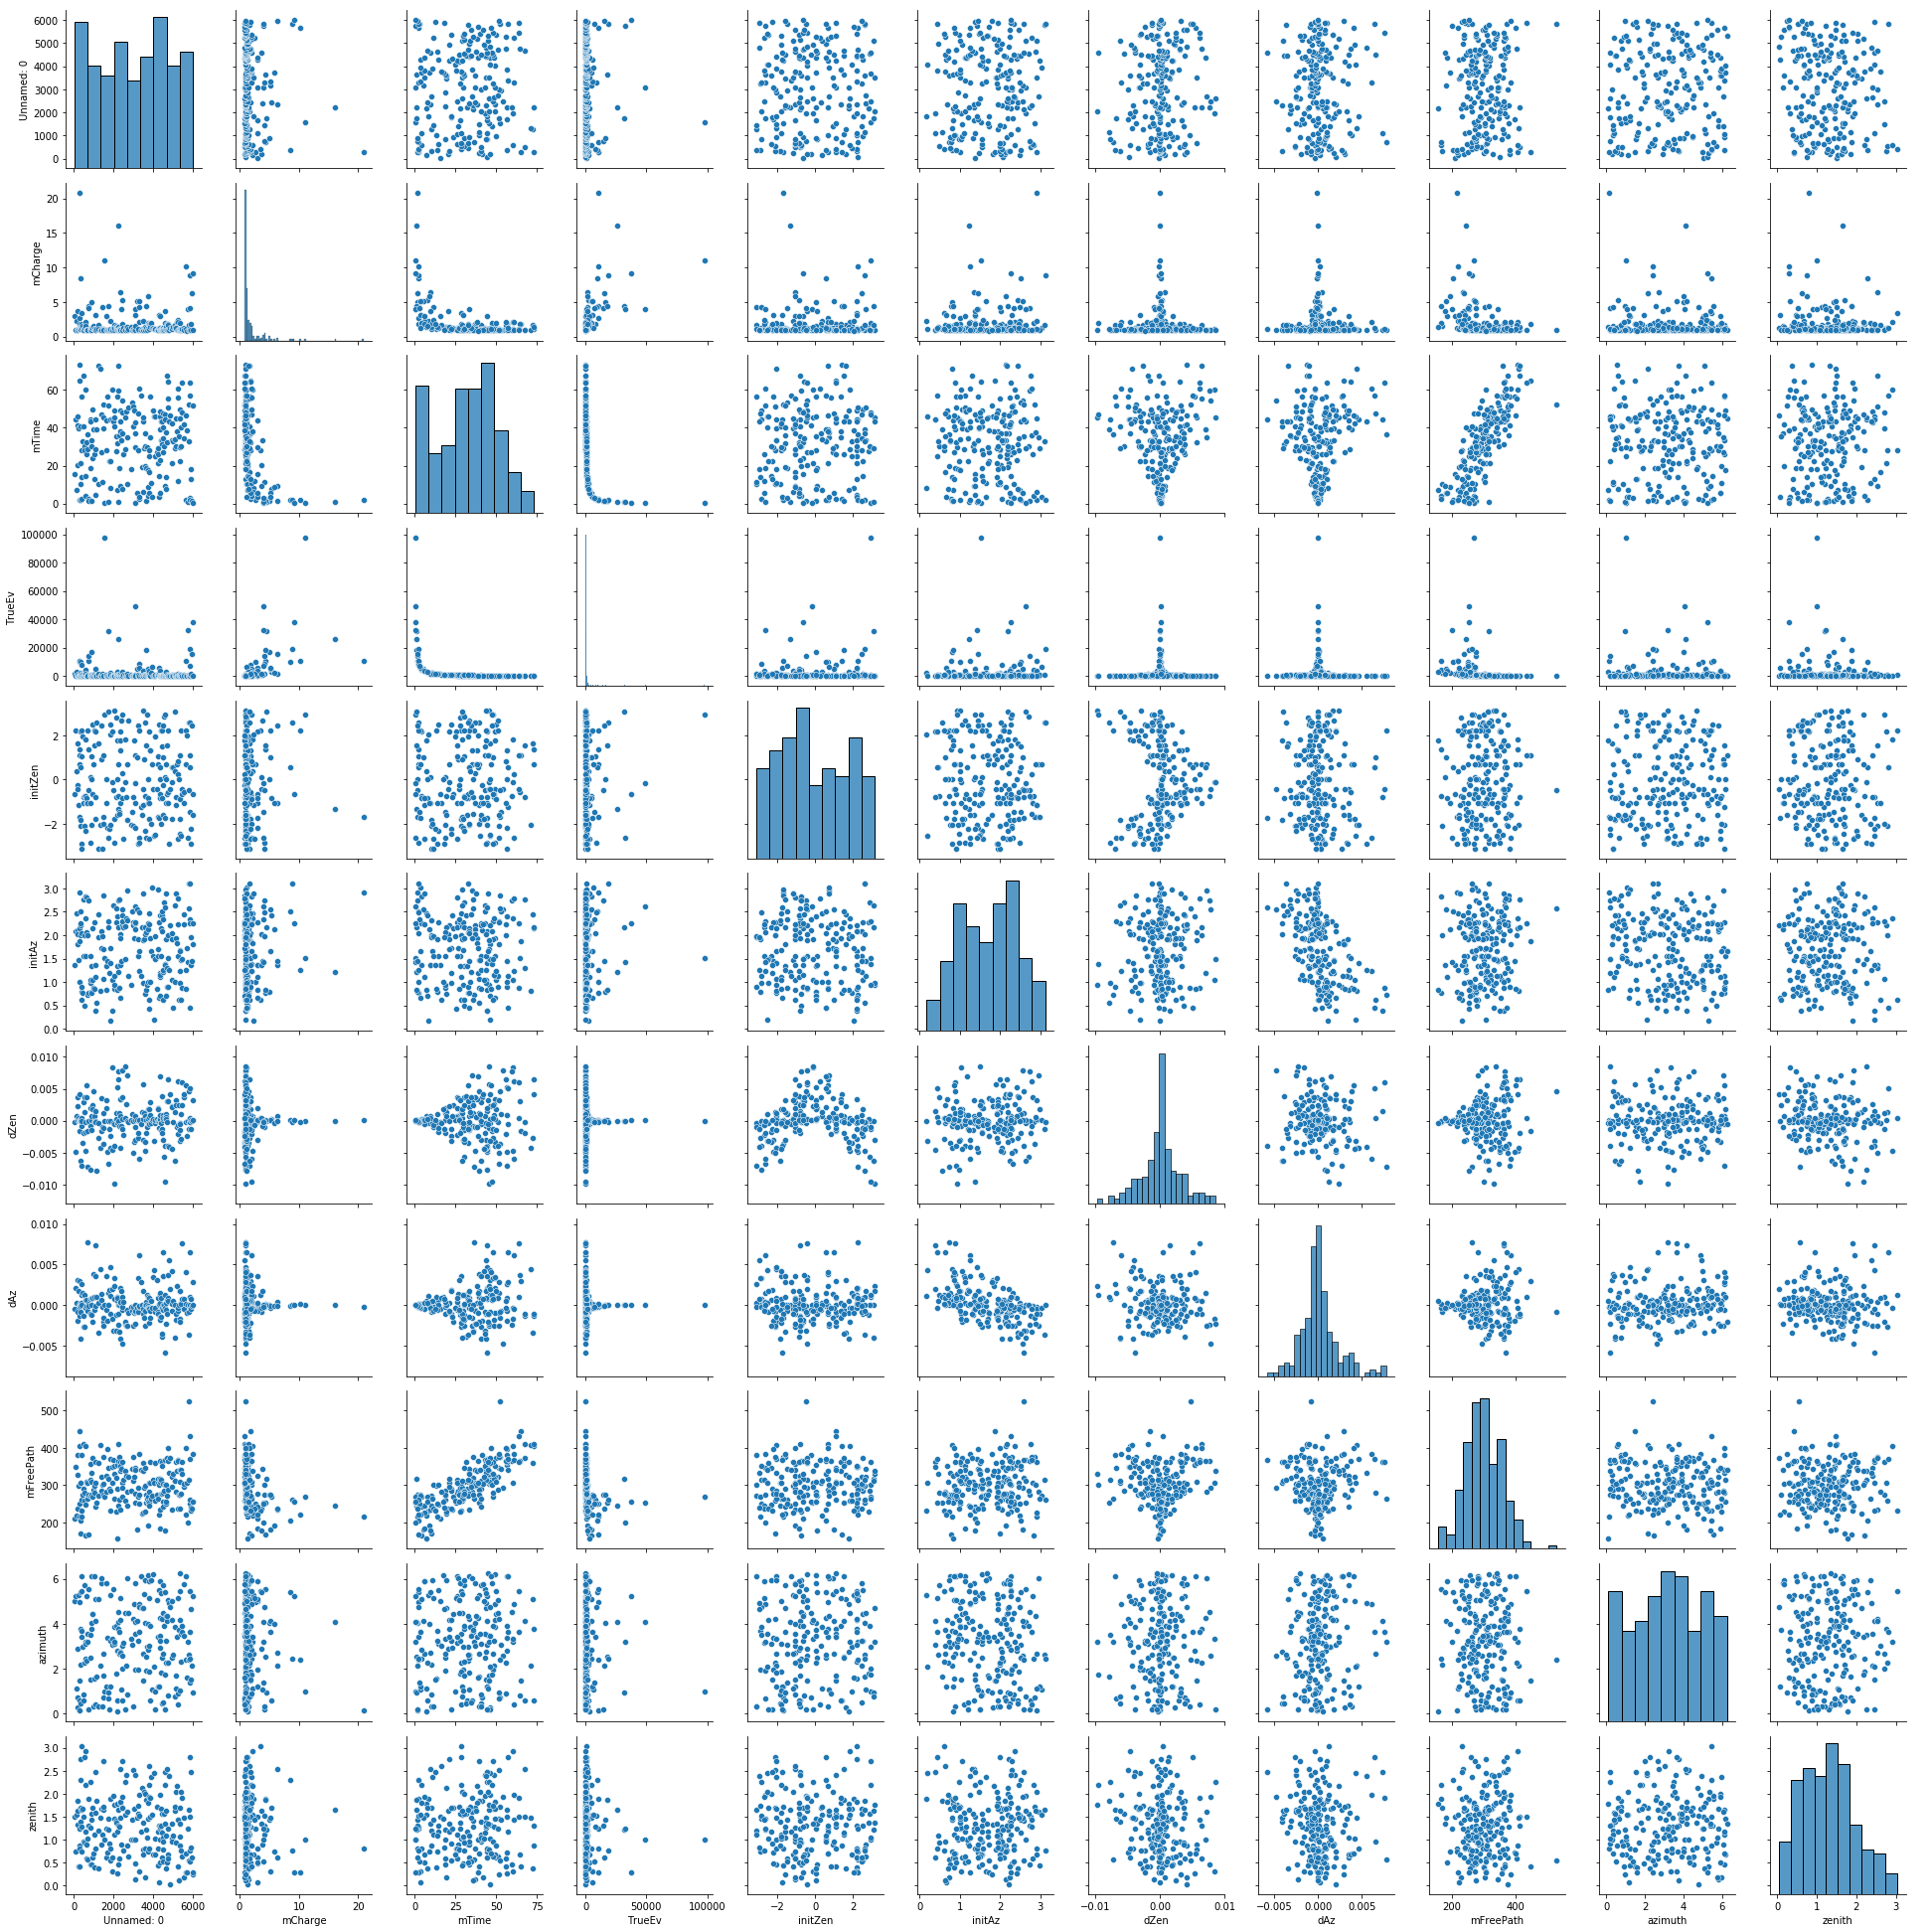

In [59]:
sns.pairplot(train_TrueEv, height= 2.5)

on the left plot we have the one where the true events > 200 on the right the entire sample space where 1000 points are chosen randomly. 
- dAz  on the (L) skewed towards left
- mFree Path (L) skewed towards L while the (R) one is towards Right
- mTime VS mFree path is 'more' straight for (L) compared to (R) where it is narrow in the beginning and the spreads up for higher mTime
- Zenith Histogram (L) is shifted towards Left while on (R) it is equally distributed 
- The scatter(R) between the initialAz and dAz is a straight line with negative slope and ofc a spread to it. Whilw (L) it loses the character
Otherwise (L) and (R)  are more or less same! 

### Summary :
The columns don't look like an outlier. 
